## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING
### Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
### Tasks:
1.	Handle missing values as per the best practices (imputation, removal, etc.).
    - Apply scaling techniques to numerical features:
        * Standard Scaling   
        * Min-Max Scaling
    - Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
    - Apply One-Hot Encoding to categorical variables with less than 5 categories.
    - Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
    - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    - les with more than 5 categories.
    - Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
    - Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
    - Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


In [35]:
import pandas as pd
import numpy as np


In [36]:
df = pd.read_csv('adult_with_headers (1).csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1.	Handle missing values as per the best practices (imputation, removal, etc.).
    - Apply scaling techniques to numerical features:
        * Standard Scaling   
        * Min-Max Scaling

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cols = ['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for col in df_cols:
    df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  int64 
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  int64 
 6   occupation      32561 non-null  int64 
 7   relationship    32561 non-null  int64 
 8   race            32561 non-null  int64 
 9   sex             32561 non-null  int64 
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  int64 
 14  income          32561 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


In [40]:
X = df.drop('income', axis=1)
y = df['income']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.291569
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.291569
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.291569
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.291569
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223


In [42]:
from sklearn.preprocessing import minmax_scale
X_minmax = minmax_scale(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)
X_minmax.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


# Discuss the scenarios where each scaling technique is preferred and why.
- Standard Scaling is preferred when the data follows a Gaussian distribution (bell curve) and when we want to center the data around zero. It is sensitive to outliers, so if the dataset contains many outliers, it may not be the best choice.
- Min-Max Scaling is useful when we want to transform features to a specific range, usually [0, 1]. It is sensitive to outliers as well, but it preserves the relationships between the original data points. It is often used in image processing and when the distribution is not Gaussian.


2. Encoding Techniques:
    - Apply One-Hot Encoding to categorical variables with less than 5 categories.
    - Use Label Encoding for categorical variables. Data Exploration and Preprocessing:
    - Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
    - les with more than 5 categories.
    - Discuss the pros and cons of One-Hot Encoding and Label Encoding.

In [43]:
df = pd.read_csv('adult_with_headers (1).csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [46]:
m5 = ['workclass','education', 'marital_status','occupation', 'relationship', 'native_country']         # more than 5 categories
l5 = ['sex','race']         # less than 5 categories

In [47]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder()
le = LabelEncoder()

# for columns with more than 5 categories we will use OneHotEncoder
ohe_df = pd.DataFrame(ohe.fit_transform(df[m5]).toarray(), columns=ohe.get_feature_names_out(m5))

# for columns with less than 5 categories we will use LabelEncoder
le_df = df[l5].apply(lambda col: le.fit_transform(col))

In [48]:
ohe_df

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
le_df

,sex,race
0,1,4
1,1,4
2,1,4
3,1,2
4,0,2
...,...,...
32556,0,4
32557,1,4
32558,0,4
32559,1,4


In [50]:
df = df.drop(columns=m5 + l5)
df = pd.concat([df, ohe_df, le_df], axis=1)
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,sex,race
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,4
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4


In [51]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,sex,race
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.056386,0.029483,0.064279,0.000215,...,0.000369,0.002457,0.001566,0.000553,0.000584,0.895857,0.002058,0.000491,0.669205,3.665858
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.230670,0.169159,0.245254,0.014661,...,0.019194,0.049507,0.039546,0.023506,0.024149,0.305451,0.045316,0.022162,0.470506,0.848806
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [53]:
print(df.isnull().sum() if df.isnull().sum().sum() > 0 else "No missing values found.")

No missing values found.


In [57]:
print(df.dtypes)

age                                int64
fnlwgt                             int64
education_num                      int64
capital_gain                       int64
capital_loss                       int64
                                  ...   
native_country_ United-States    float64
native_country_ Vietnam          float64
native_country_ Yugoslavia       float64
sex                                int64
race                               int64
Length: 104, dtype: object


In [58]:
# les with more than 5 categories
print(m5)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


## Discuss the pros and cons of One-Hot Encoding and Label Encoding.
### One-Hot Encoding:
#### Pros:
1. Prevents ordinal relationships: One-Hot Encoding does not assume any ordinal relationship between categories, making it suitable for nominal data.
2. Works well with algorithms that rely on distance metrics: Algorithms like k-NN and SVM perform better with One-Hot Encoded data as it maintains equal distance between categories.
#### Cons:
1. High dimensionality: One-Hot Encoding can lead to a significant increase in the number of features, especially with high-cardinality categorical variables, which can lead to the curse of dimensionality.
2. Sparse data: The resulting dataset can be sparse, which may not be efficient for certain algorithms.

### Label Encoding:
#### Pros:
1. Simplicity: Label Encoding is straightforward to implement and understand, as it simply assigns a unique integer to each category.
2. Low dimensionality: Unlike One-Hot Encoding, Label Encoding does not increase the dimensionality of the dataset, making it more efficient in terms of memory usage.
#### Cons:
1. Ordinal relationships: Label Encoding introduces an ordinal relationship between categories, which may not be appropriate for nominal data.
2. Misleading for certain algorithms: Algorithms that rely on distance metrics may interpret the encoded values as having meaningful relationships, leading to biased results.


3. Feature Engineering:
* Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
* Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [62]:
# Feature Engineering:
# Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

df['net_capital'] = df['capital_gain'] - df['capital_loss']
# net_capital: here we will get to know about the net effect of capital gains and losses.

df['has_capital'] = (df['capital_gain'] > 0).astype(int)
# has_capital: it will help to identify people with any capital gain, which help to know their financial situation.

df['age_hours_ratio'] = round(df['hours_per_week'] / (df['age']), 2)
# age_hours_ratio: it will capture the work and age relationship. which helps us to identify how much a person is working relative to their age.

df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,sex,race,net_capital,has_capital,age_hours_ratio
0,39,77516,13,2174,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,2174,1,1.03
1,50,83311,13,0,0,13,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,0,0,0.26
2,38,215646,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,0,0,1.05
3,53,234721,7,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,2,0,0,0.75
4,28,338409,13,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,2,0,0,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,4,0,0,1.41
32557,40,154374,9,0,0,40,>50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,0,0,1.00
32558,58,151910,9,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,4,0,0,0.69
32559,22,201490,9,0,0,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,0,0,0.91


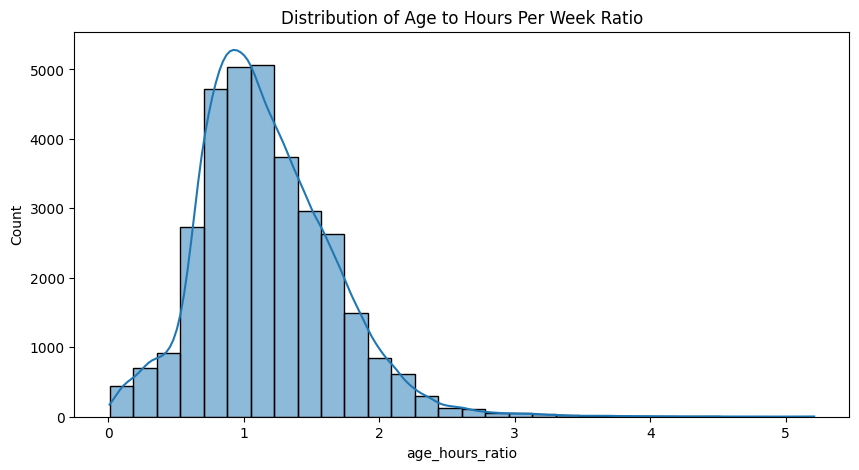

Skewness before transformation: 0.7474563915343864


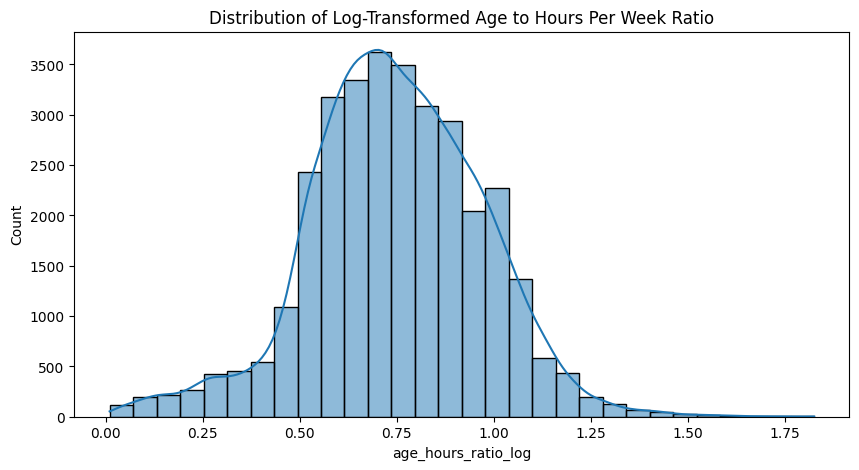

Skewness after transformation: -0.12012337672993241


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['age_hours_ratio'], bins=30, kde=True)
plt.title('Distribution of Age to Hours Per Week Ratio')
plt.show()
print("Skewness before transformation:", df['age_hours_ratio'].skew())
# The age_hours_ratio feature is right-skewed, indicating that a small number of individuals work more hours as compared to their age.

# By applying a log transformation to age_hours_ratio will help to normalize its distribution.
df['age_hours_ratio_log'] = np.log1p(df['age_hours_ratio'])
plt.figure(figsize=(10, 5))
sns.histplot(df['age_hours_ratio_log'], bins=30, kde=True)
plt.title('Distribution of Log-Transformed Age to Hours Per Week Ratio')
plt.show()
print("Skewness after transformation:", df['age_hours_ratio_log'].skew())
# The log transformation has helped to reduce the skewness of the age_hours_ratio feature, making it more normally distributed.